In [5]:
#import all the necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Plotting the Scatter Plot Graph

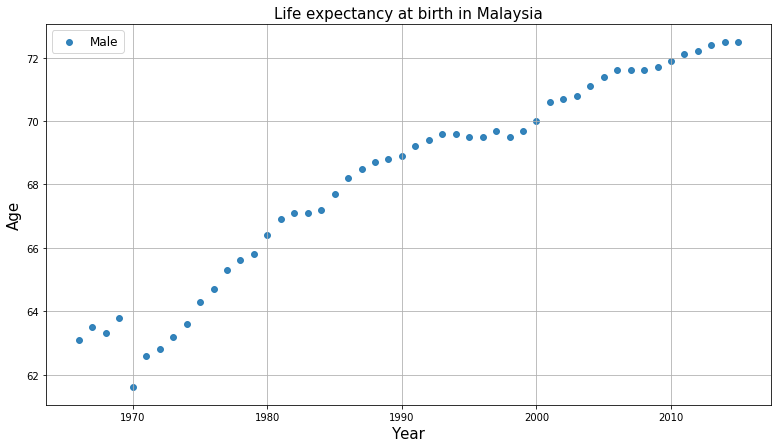

Correlation coefficient is 0.9746


In [6]:
#set directory
df= pd.read_excel('SET_A.xlsx','QUESTION 1')
#drop description label as it was not needed
df.drop(df[['Description']], axis=1, inplace=True)

#set plot
x = df['Year']
y = df['Male']
fig,(ax1) = plt.subplots(1, figsize = (13,7))
#scatter plotting
ax1.scatter (x, y, s = 35, label='Male', alpha = 0.9)
#set axis label and title
plt.xlabel('Year', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.title('Life expectancy at birth in Malaysia', fontsize=15)
plt.grid()
plt.legend(fontsize=12)
plt.show()

#calculate the correlation coefficient of x and y
r = np.corrcoef(x, y)
print('Correlation coefficient is', round(r[1,0],4))

# Normalize Feature and Plotting Scatter Plot Graph

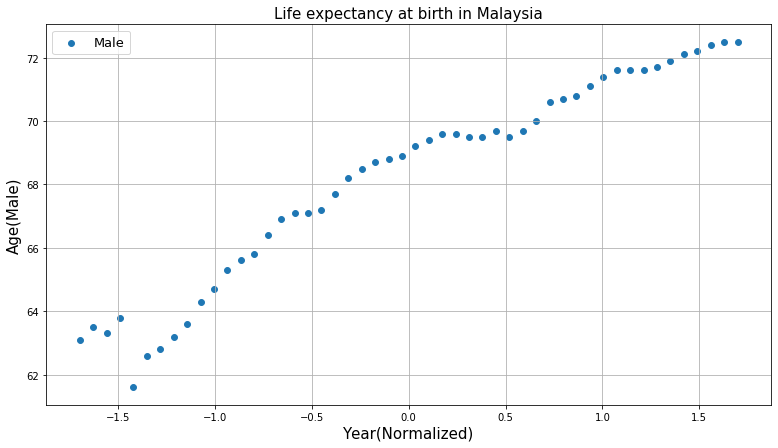

In [7]:
#normalize X variable
def featureNormalize(x):
    """This function takes the features as input and
    returns the normalized values, the mean, as well 
    as the standard deviation for each feature."""
    X_norm = (x - np.mean(x))/np.std(x) ## Scaling function.
    mu = np.mean(x) ## Define the mean
    sigma = np.std(x) ## Define the standard deviation.
    return X_norm, mu, sigma ## return the values.

x_Normal, mean, std = featureNormalize(x)
#set plot
fig,(ax1) = plt.subplots(1, figsize = (13,7))
#scatter plotting
ax1.scatter (x_Normal, y, s = 35, label='Male')
#set label
plt.xlabel('Year(Normalized)', fontsize=15)
plt.ylabel('Age(Male)', fontsize=15)
plt.title('Life expectancy at birth in Malaysia', fontsize=15)
plt.grid()
plt.legend(fontsize=13)
plt.show()

# Computing Cost Function and Gradient Descent

In [8]:
#function to calculate h_theta(x)
def hypothesis (theta_0,theta_1,X):
    return theta_1 * X + theta_0

#function to calculate cost function(J_theta)
def cost_function (X,y,theta_0,theta_1):
    total = 0.0
    for i in range (len(X)):
        #calculate the total of squared error
        total += ((theta_1 * X[i] + theta_0) - y[i]) ** 2
    return total / (2 * (len(X)))

#function to calculate gradient descent
def gradient_descent(X,y,theta_0,theta_1,a):
    t0_deriv = 0
    t1_deriv = 0
    for i in range (len(X)): #len(x) represent number of variables
        #calculate the total of derivative with respect to theta_1 and theta_0
        t0_deriv += (theta_1 * X[i] + theta_0) - y[i]
        t1_deriv += ((theta_1 * X[i] + theta_0) - y[i]) * X[i]
    theta_0 -= (1/(len(X))) * a * t0_deriv
    theta_1 -= (1/(len(X))) * a * t1_deriv
    return theta_0,theta_1

#function to do linear regression using cost function and gradient descent
def training (X, y, theta_0, theta_1, a, iterations):
    #define empty array to store t1 changes, t2 changes annd cost function changes at each iteration
    cost_history = [0]
    t0_history = [0]
    t1_history = [0]
    for i in range(iterations):
        theta_0,theta_1 = gradient_descent(X, y, theta_0, theta_1, a)
        t0_history.append(theta_0)
        t1_history.append(theta_1)
        cost_history.append(cost_function(X, y, theta_0, theta_1))
    return t0_history, t1_history, cost_history

In [9]:
#initialize learning and number of iteration
a = 0.01 #learning rate
iteration = 600
#initialize both theta_1 and theta_0 to 0
theta_0 = 0
theta_1 = 0
#define cost_value_old variable to store cost function value before optimizing theta_0 and theta_1 
cost_value_old = cost_function(x_Normal, y, theta_0, theta_1)
t0_history, t1_history, cost_history = training(x_Normal, y, theta_0, theta_1, a, iteration)
#assign optimized theta values to theta_0_opt and theta_1_opt
theta_0_opt = t0_history[-1]
theta_1_opt = t1_history[-1]
#define cost_value_new variable to store cost function value after optimizing theta_0 and theta_1 
cost_value_new = cost_function(x_Normal, y, theta_0_opt, theta_1_opt)
print('Cost function with both theta initialize to zero is', round(cost_value_old,3))
print('Cost function with both theta value optimized is', round(cost_value_new,4))
print('theta_0 = {:0.3f}, theta_1 = {:0.4f}'.format(theta_0_opt, theta_1_opt))

Cost function with both theta initialize to zero is 2329.422
Cost function with both theta value optimized is 0.2661
theta_0 = 68.018, theta_1 = 3.0834


# Plotting 3D Graph and Convergence Graph

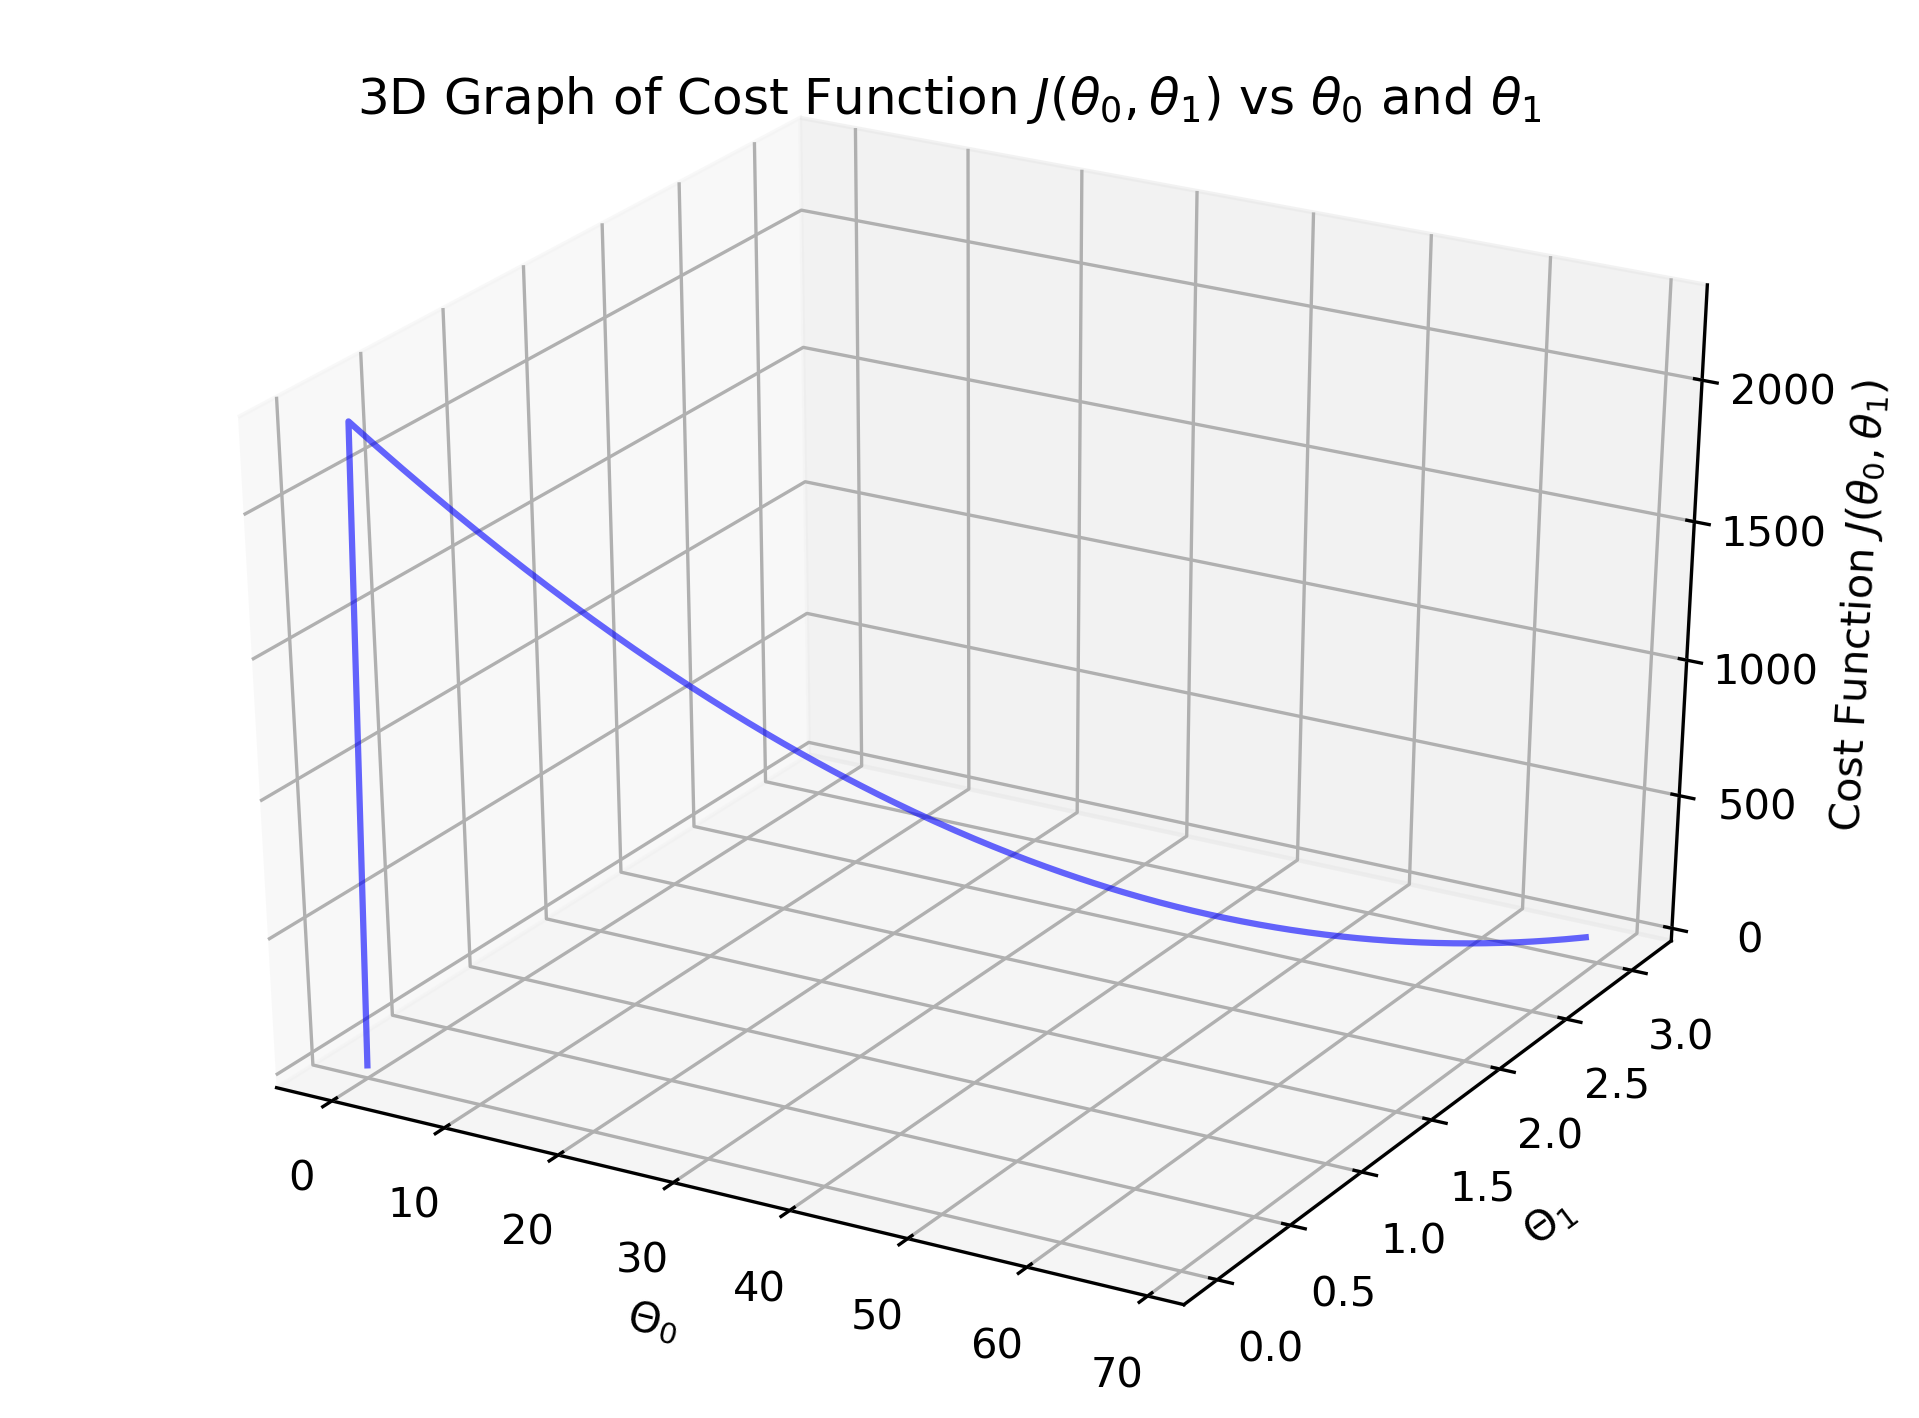

In [10]:
#plotting 3d graph of cost function J_theta vs theta_0 and theta_1
#setting graph size
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['figure.dpi'] = 300
#display 3D graph
fig = plt.figure()
ax = plt.axes(projection='3d')
#setting label and axis
ax.set_xlabel('$\Theta_0$')
ax.set_ylabel('$\Theta_1$')
ax.set_zlabel(r'Cost Function $J(\theta_0,\theta_1)$')
ax.set_title(r'3D Graph of Cost Function $J(\theta_0,\theta_1)$ vs $\theta_0$ and $\theta_1$  ')
ax.plot3D(t0_history, t1_history, cost_history, 'blue', alpha = 0.6)

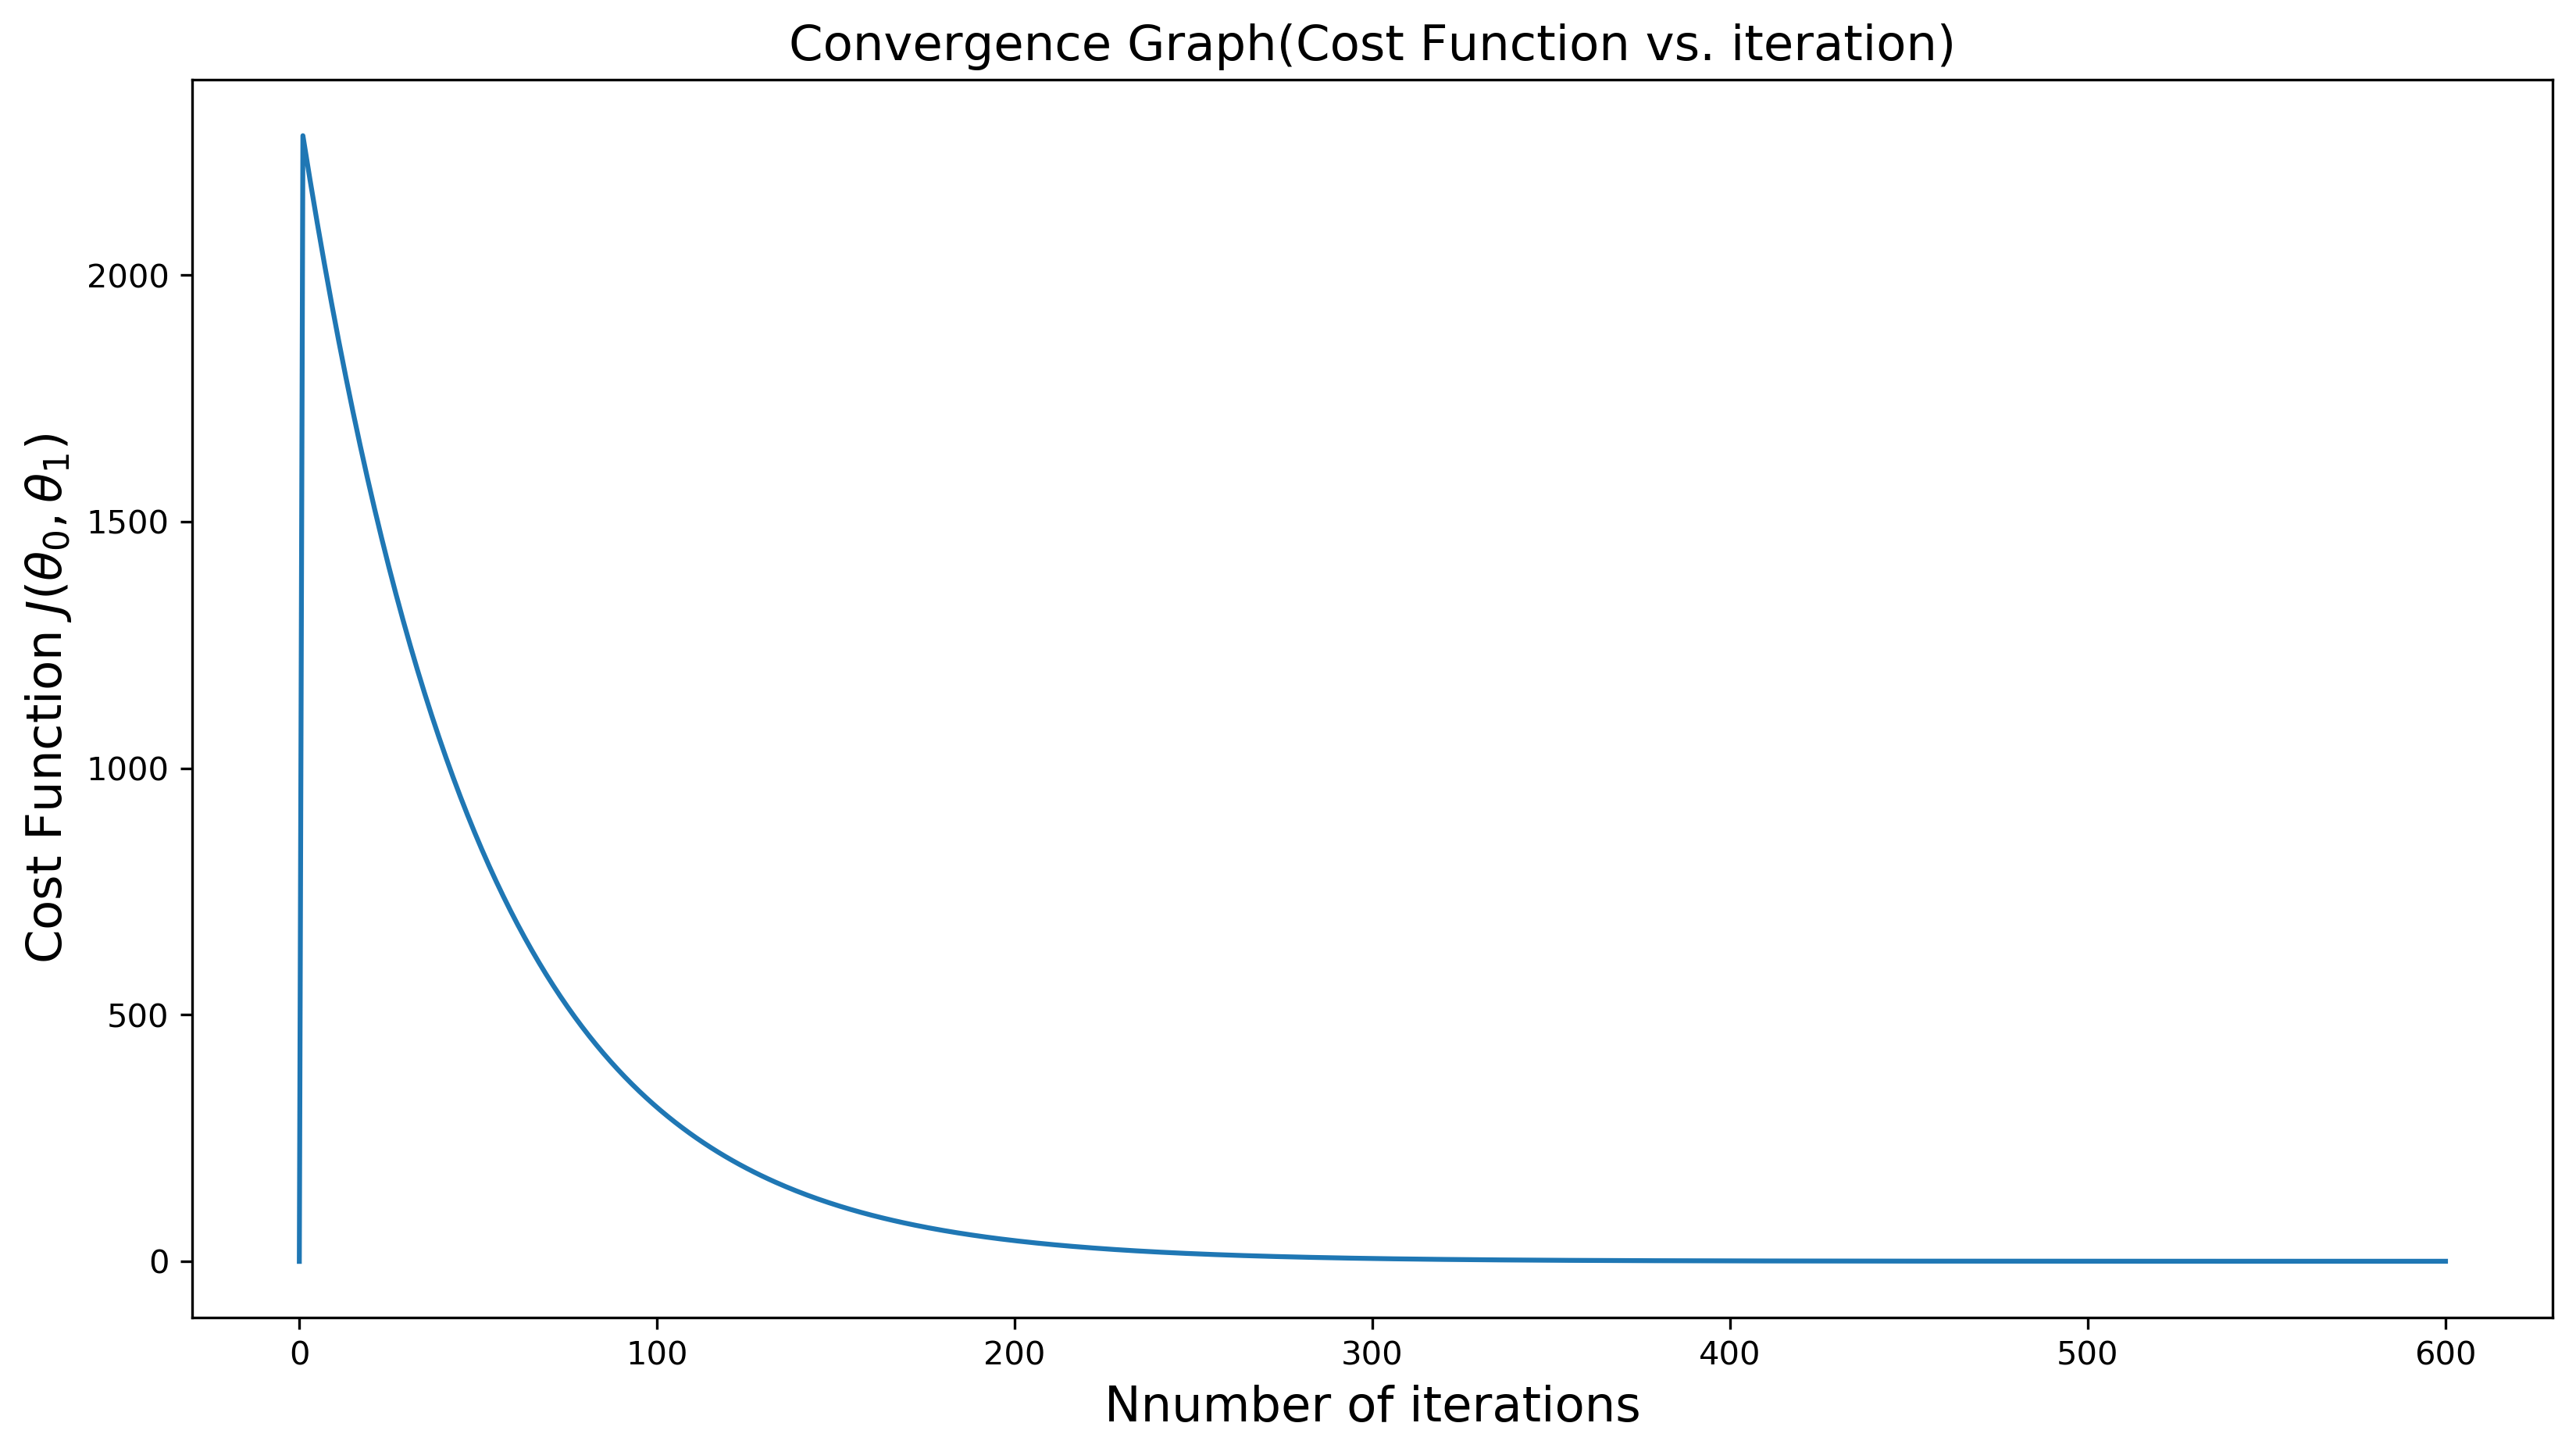

In [11]:
#Plot the convergence graph of cost function vs iteration
fig,(ax1) = plt.subplots(1, figsize = (13,7))
plt.title('Convergence Graph(Cost Function vs. iteration)', fontsize = 15)
plt.xlabel('Nnumber of iterations', fontsize = 15)
plt.ylabel(r'Cost Function $J(\theta_0,\theta_1)$', fontsize = 15)
plt.plot(cost_history)
plt.show()

# Calculating Predicted Value and Plot Regression Line

h_theta(x) = 3.0834x + 68.018
Predicted life expectency is 75.389 years.


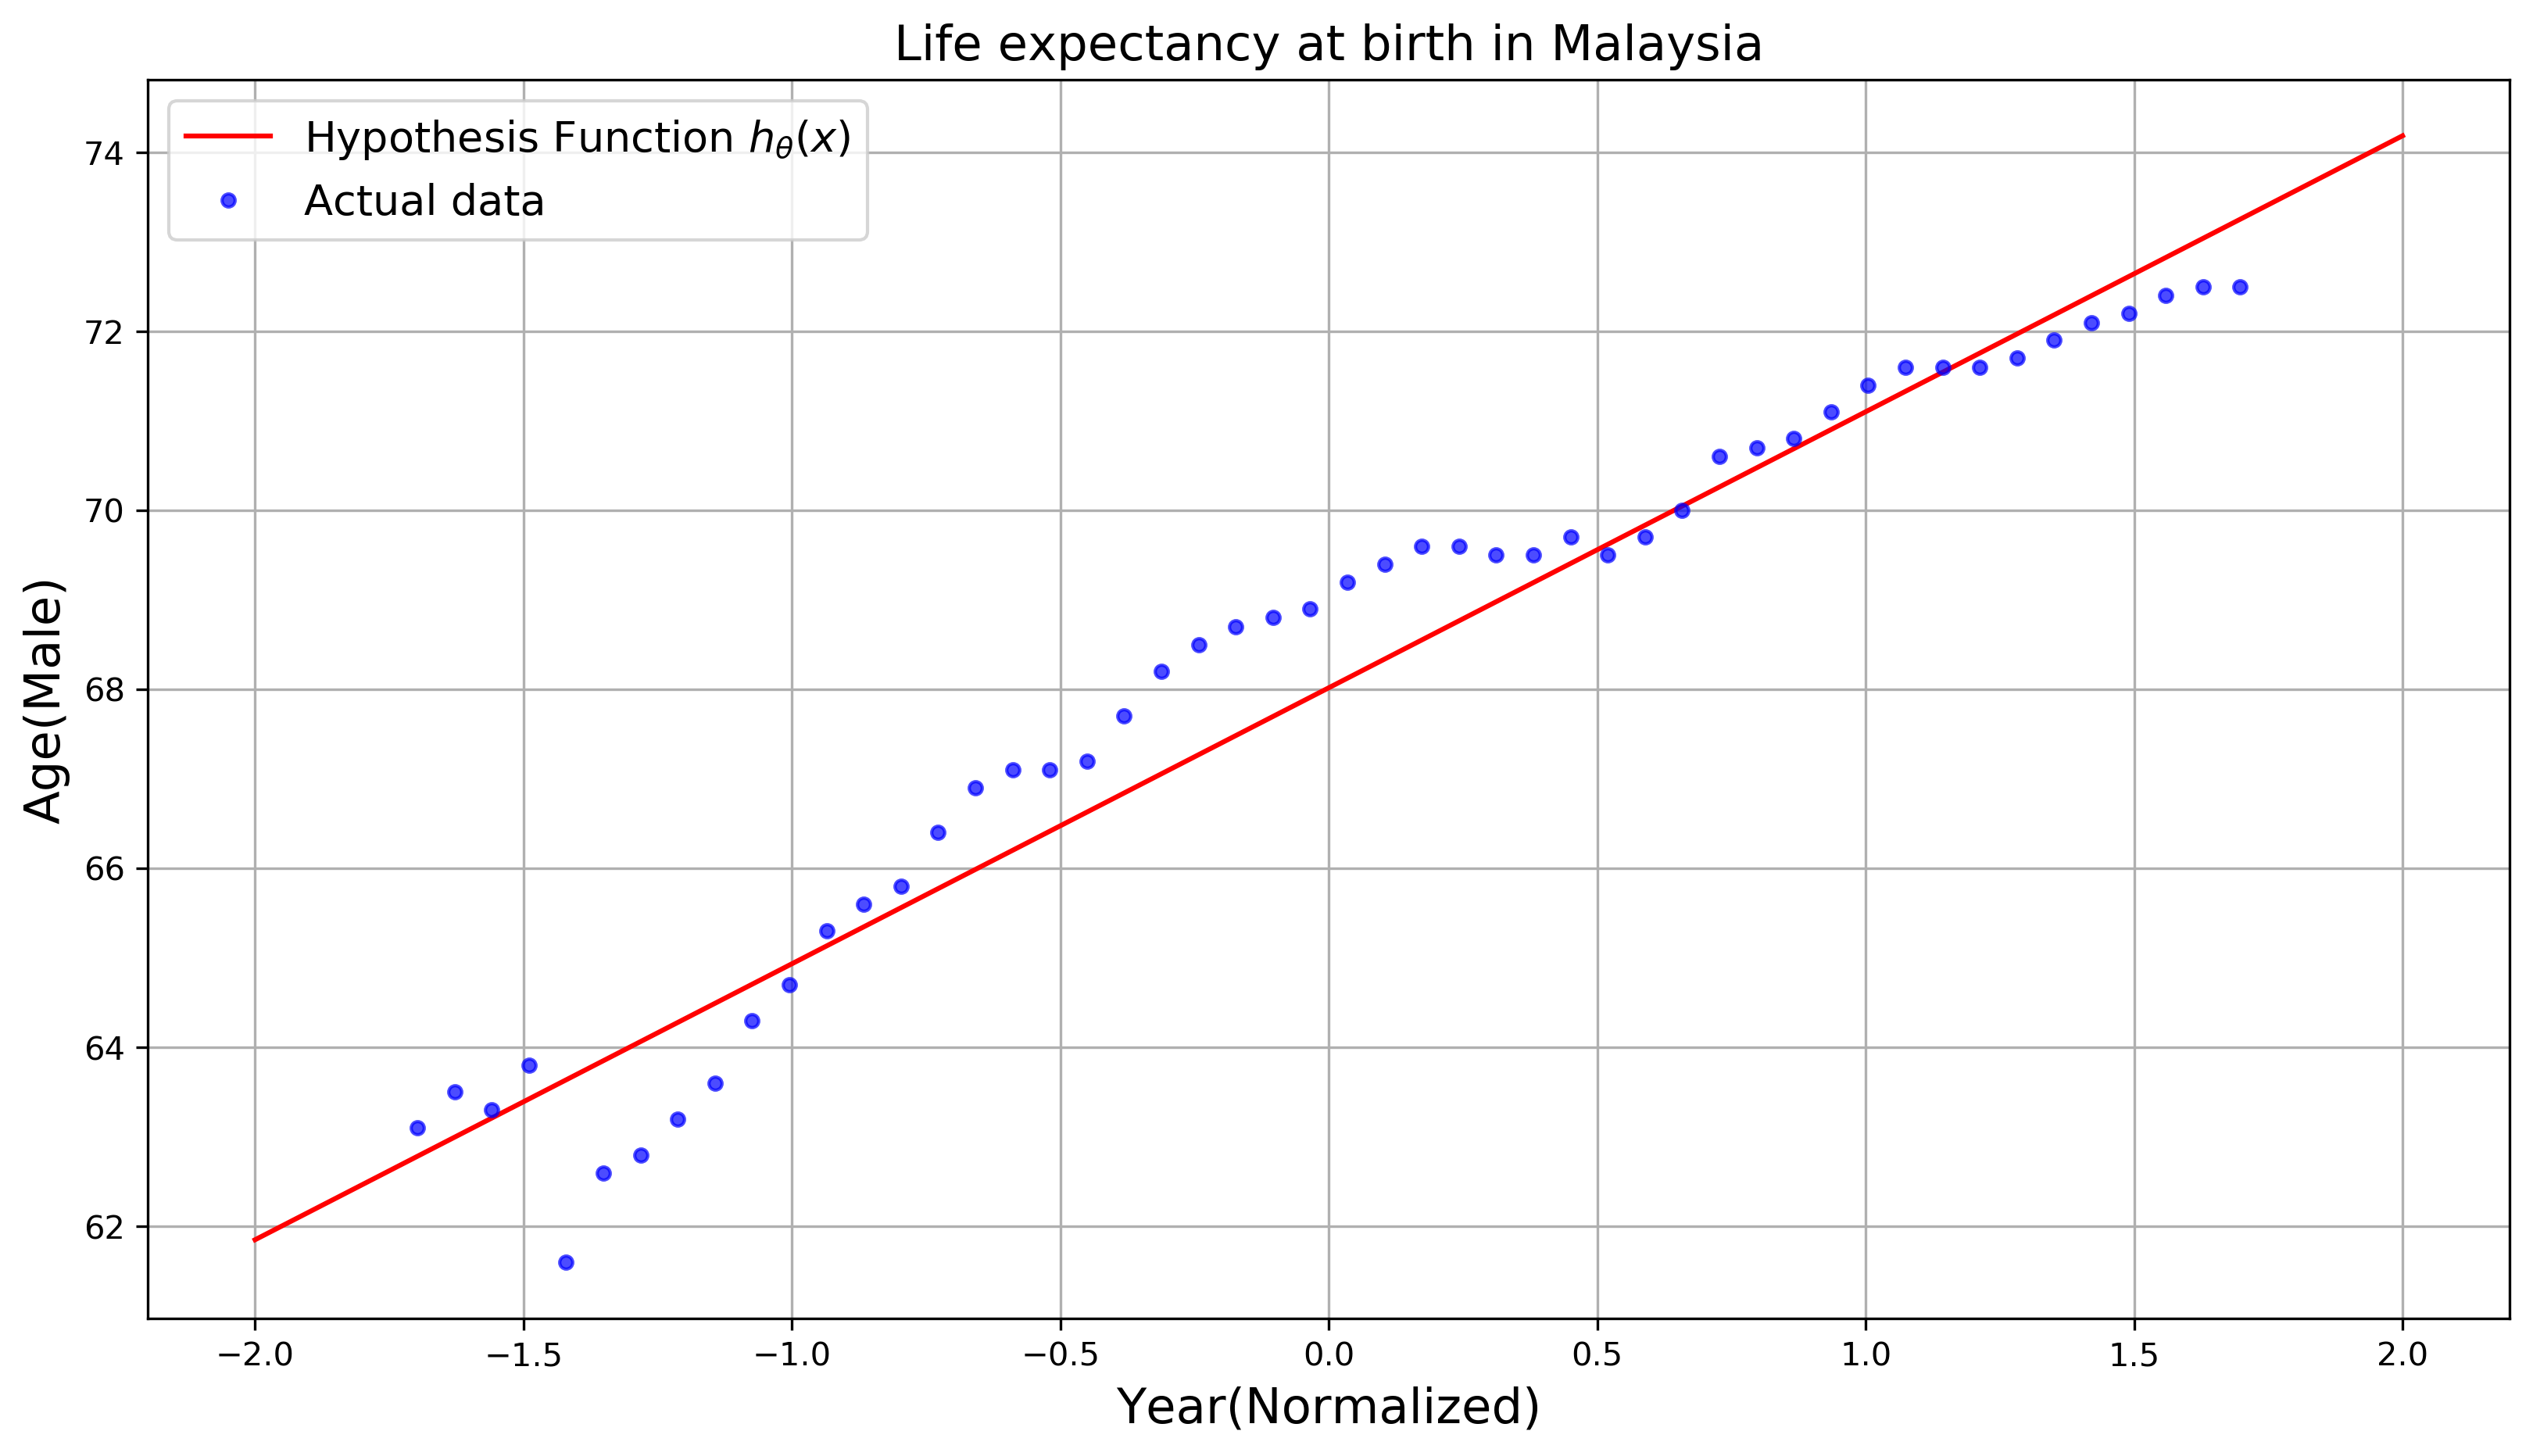

In [12]:
#Print out linear regression H_theta(x) formula with optimized theta values
print('h_theta(x) = {:0.4f}x + {:0.3f}'.format(theta_1_opt,theta_0_opt))
#Calculate the predicted life expectency at birth in year 2025 for male
x_New = 2025
#Normalized variable x_New and calculate predicted value
x_New = (x_New - mean)/std 
prediction = (x_New * theta_1_opt) + theta_0_opt
print('Predicted life expectency is', round(prediction,3), 'years.')

#assign variables to store values to plot hypothesis function h_theta(x)
x_new_b = np.array([-2,2])
y_predict = np.array([(x_new_b[0] * theta_1_opt) + theta_0_opt,(x_new_b[1] * theta_1_opt) + theta_0_opt])
#plot scatter plot along with hypothesis function h_theta(x)
plt.figure(figsize=(13,7))
plt.xlabel('Year(Normalized)', fontsize=15)
plt.ylabel('Age(Male)', fontsize=15)
plt.title('Life expectancy at birth in Malaysia', fontsize=15)
plt.grid()
plt.plot(x_new_b,y_predict,'r-', label=r'Hypothesis Function $h_\theta(x)$')
plt.plot(x_Normal,y,'b.', alpha=0.7, markersize=8, label='Actual data')
plt.legend(fontsize=13)
plt.show()

# Compute Gradient Descent With Different Learning Rate

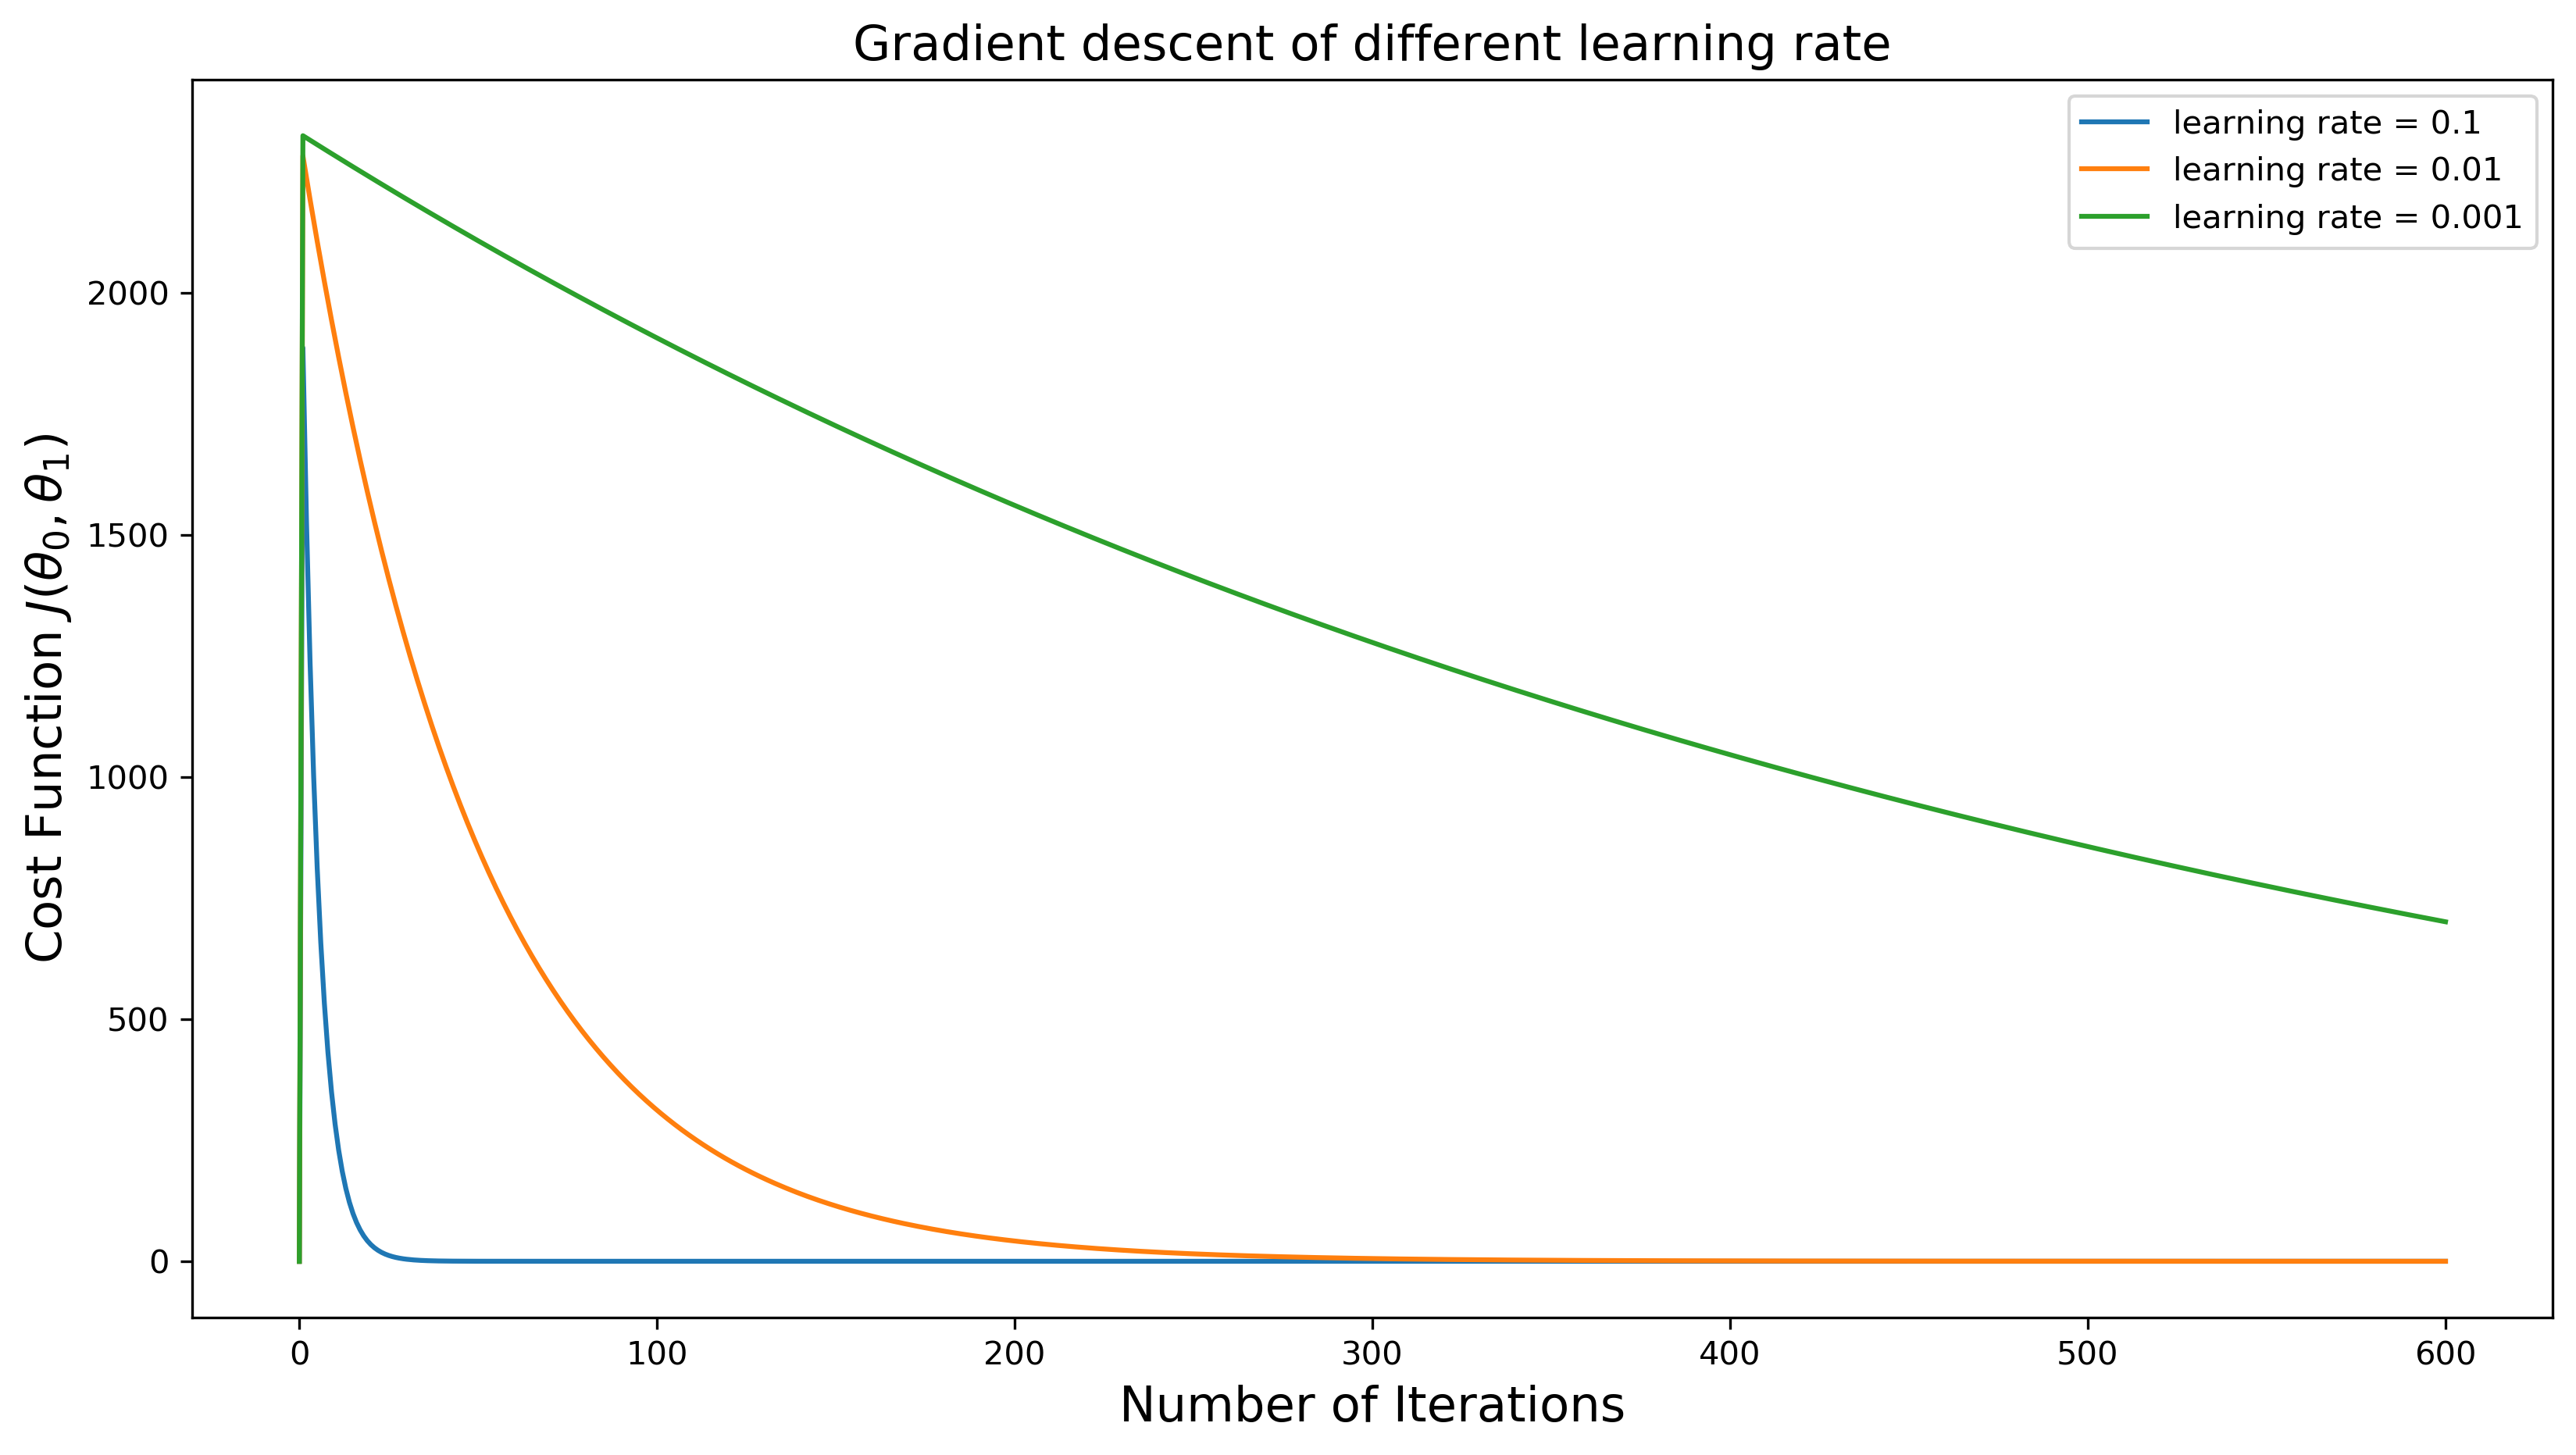

In [13]:
#calculate gradient descent with different learning rate
#learning rate at 0.1
a = 0.1
theta_0 = theta_1 = 0
t0_history_1, t1_history_1, cost_history_1 = training(x_Normal, y, theta_0, theta_1, a, iteration)
#learning rate at 0.001
a = 0.001
theta_0 = theta_1 = 0 
t0_history_2, t1_histor_2, cost_history_2 = training(x_Normal, y, theta_0, theta_1, a, iteration)

#plotting convergence graph with learning rate 0.1 and 0.001
fig,(ax1) = plt.subplots(1, figsize = (13,7))
plt.plot(cost_history_1, label='learning rate = 0.1')
plt.plot(cost_history, label='learning rate = 0.01')
plt.plot(cost_history_2, label='learning rate = 0.001')
plt.title('Gradient descent of different learning rate', fontsize = 15)
plt.xlabel('Number of Iterations', fontsize = 15)
plt.ylabel(r'Cost Function $J(\theta_0,\theta_1)$', fontsize = 15)
plt.legend()